In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
## loading airway data
p,x = load_airway(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
#print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)

## airway data ##
# hypothesis: 33469
p=0.000153542287814, x=6.56329425437
p=0.0655868795554, x=6.25440153322
p=0.793765241592, x=5.4687478236
p=0.735407241539, x=4.05928083764
p=0.578223628721, x=-1.14539457803


## bh testing summary ##
# n_rej = 4079
# t_rej = 0.012180


## sbh summary ##
# n_rej = 4079
# t_rej = 0.012180
# pi_0 estimate = 1.000




### Testing PrimFDR_cv (3-fold validation)

Baseline: 
Screen Shot 2018-02-13 at 10.43.14 PM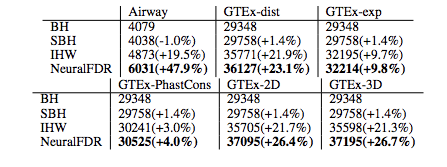

#time start: 0.0s
#time input: 0.0008s
## testing fold 1: 0.0009s
pfdr_test start
PrimFDR start
gamma1 0.4519944304591726
0 1.0000000000000002 2710 593 0.21881918819188192
0 0.5000000000000001 2243 288 0.12839946500222915
0 0.25000000000000006 1895 142 0.07493403693931398
0.12500000000000003 0.25000000000000006 2077 221 0.10640346653827636
0.12500000000000003 0.18750000000000006 1985 195 0.0982367758186398
0.15625000000000006 0.18750000000000006 2033 205 0.10083620265617314
0.15625000000000006 0.17187500000000006 2012 199 0.0989065606361829
0.16406250000000006 0.17187500000000006 2025 202 0.09975308641975308
0.16796875000000006 0.17187500000000006 2031 204 0.10044313146233383
0.16796875000000006 0.16992187500000006 2026 203 0.10019743336623889
0.16796875000000006 0.16894531250000006 2025 203 0.10024691358024691
0.16796875000000006 0.16845703125000006 2025 202 0.09975308641975308
0.16821289062500006 0.16845703125000006 2025 203 0.10024691358024691
0.16821289062500006 0.16833496093750006

gamma1 0.45920239004700797
0 1.0 2700 640 0.23703703703703705
0 0.5 2151 309 0.14365411436541142
0 0.25 1788 141 0.07885906040268456
0.125 0.25 1999 218 0.10905452726363181
0.125 0.1875 1896 184 0.0970464135021097
0.15625 0.1875 1943 198 0.10190427174472465
0.15625 0.171875 1917 189 0.09859154929577464
0.1640625 0.171875 1933 192 0.09932747025349198
0.16796875 0.171875 1940 193 0.09948453608247422
0.169921875 0.171875 1943 195 0.10036026762738035
0.169921875 0.1708984375 1940 194 0.1
0.169921875 0.17041015625 1940 193 0.09948453608247422
0.170166015625 0.17041015625 1940 193 0.09948453608247422
0.1702880859375 0.17041015625 1940 194 0.1
0.1702880859375 0.17034912109375 1940 194 0.1
0.1702880859375 0.170318603515625 1940 194 0.1
0.1702880859375 0.1703033447265625 1940 193 0.09948453608247422
0.17029571533203125 0.1703033447265625 1940 193 0.09948453608247422
0.17029953002929688 0.1703033447265625 1940 194 0.1
0.17029953002929688 0.1703014373779297 1940 193 0.09948453608247422
0.17030048

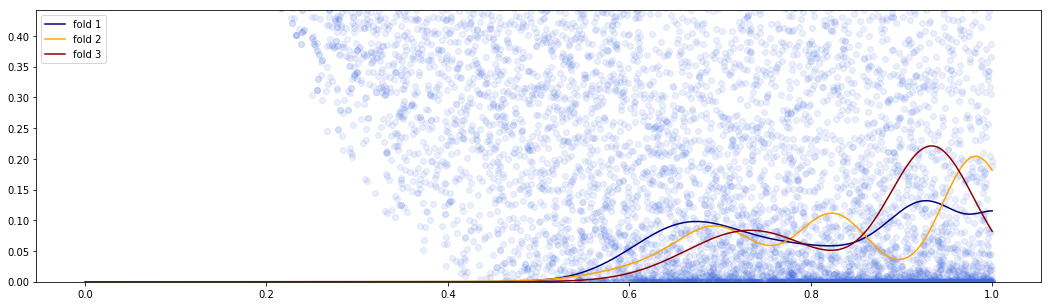

#time total: 4948.1390s


In [3]:
_=PrimFDR_cv(p,x,5,alpha=0.1,n_itr=10000,h=None,verbose=True)

## PrimFDR_init starts
# Learning null distribution
## initialization
Slope: w=0.5, a=-1.6991552734375
Bump 0: w=0.1, mu=[0.40372167], sigma=[0.0695503]
Bump 1: w=0.1, mu=[0.22568075], sigma=[0.06105949]
Bump 2: w=0.1, mu=[0.59441342], sigma=[0.08340786]
Bump 3: w=0.1, mu=[0.07806229], sigma=[0.04891143]
Bump 4: w=0.1, mu=[0.84842729], sigma=[0.08687739]


Slope: w=0.5205535778844163, a=-0.6248291015625
Bump 0: w=0.06477315856520717, mu=[0.47010145], sigma=[0.07632464]
Bump 1: w=0.2783341850625756, mu=[0.19516603], sigma=[0.13703162]
Bump 2: w=0.009880661802168433, mu=[0.56626626], sigma=[0.07350832]
Bump 3: w=0.085012792659522, mu=[0.03446512], sigma=[0.09659299]
Bump 4: w=0.041445624026110434, mu=[0.35128829], sigma=[0.25691861]




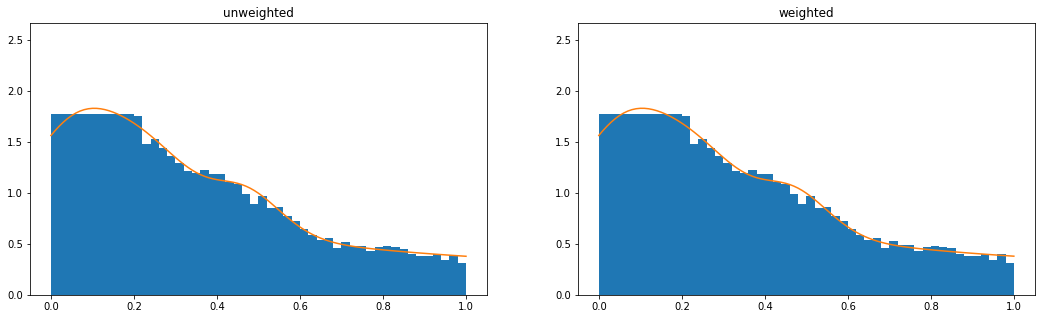

# Learning alternative distribution
## initialization
Slope: w=0.5, a=4.452915039062501
Bump 0: w=0.1, mu=[0.78429167], sigma=[0.03762177]
Bump 1: w=0.1, mu=[0.87895798], sigma=[0.03477739]
Bump 2: w=0.1, mu=[0.576266], sigma=[0.05855526]
Bump 3: w=0.1, mu=[0.96155688], sigma=[0.02464137]
Bump 4: w=0.1, mu=[0.67936577], sigma=[0.04237075]




/home/martin/NeuralFDR2/NeuralFDR2/prim_fdr.py:569: RuntimeWarning: invalid value encountered in log
  l = -np.log(Z) - np.log(sigma) - t/2/sigma**2


Slope: w=0.010296899418032263, a=4.452915039062501
Bump 0: w=0.004684554359724061, mu=[0.79608152], sigma=[0.03143708]
Bump 1: w=0.0025479595621427055, mu=[0.77001896], sigma=[0.09014886]
Bump 2: w=0.04269549045758797, mu=[0.81368116], sigma=[0.12874355]
Bump 3: w=0.590280356772855, mu=[0.94120863], sigma=[0.09013675]
Bump 4: w=0.3494947394296581, mu=[0.71618752], sigma=[0.0974317]




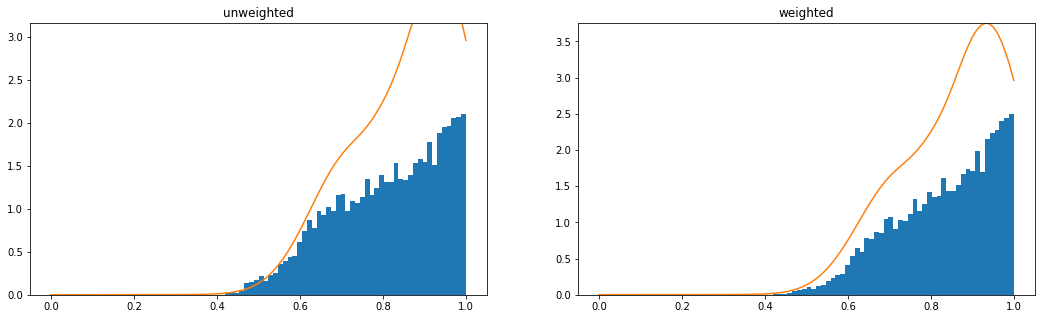

# Test result with PrimFDR_init
# Num of discovery: 6044




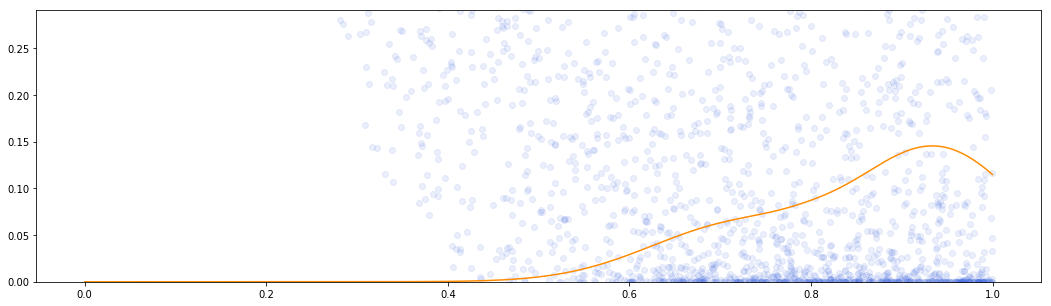

## PrimFDR_init finishes

## optimization paramter:
# n_itr=100, n_samp=33469, lambda0=826, lambda1=100

## optimization initialization:
# Slope: a=[4.452915], b=[-10.072008]
# Bump 0: w=-5.3711085, mu=[0.79608154], sigma=[0.00197658]
# Bump 1: w=-7.0335608, mu=[0.77001894], sigma=[0.01625363]
# Bump 2: w=-4.5711203, mu=[0.8136812], sigma=[0.0331498]
# Bump 3: w=-1.5881217, mu=[0.94120866], sigma=[0.01624927]
# Bump 4: w=-2.1900544, mu=[0.71618754], sigma=[0.01898587]


## iteration 0
n_rej:  7039
n_rej sig:  7035.841
FD esti mirror: 1086
FD esti mirror sig: 1093.3743
loss1:  [-0.21021964]
loss2:  [1.1646298]
Estimated FDP: [0.15540062]
FDP: 0.0
Slope: a=[4.447915], b=[-10.077008]
Bump 0: w=-5.376108, mu=[0.80108154], sigma=[0.00197658]
Bump 1: w=-7.0385604, mu=[0.7750188], sigma=[0.01625363]
Bump 2: w=-4.5761204, mu=[0.8186812], sigma=[0.0331498]
Bump 3: w=-1.5931216, mu=[0.94620866], sigma=[0.01624927]
Bump 4: w=-2.1950545, mu=[0.72118753], sigma=[0.01898587]


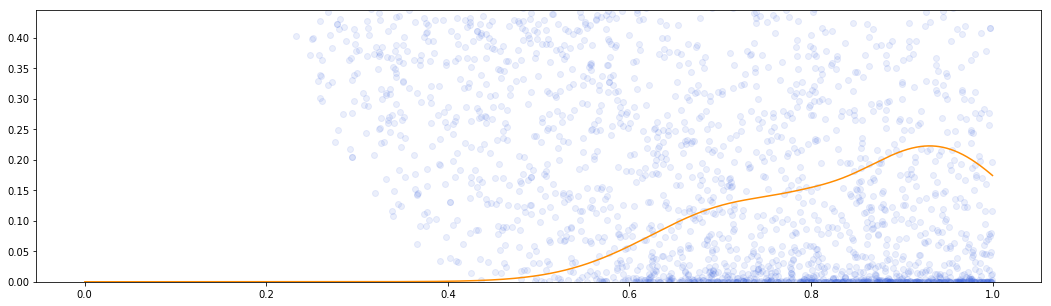



## iteration 20
n_rej:  6107
n_rej sig:  6102.706
FD esti mirror: 648
FD esti mirror sig: 658.9339
loss1:  [-0.18233906]
loss2:  [0.14539808]
Estimated FDP: [0.10797405]
FDP: 0.0
Slope: a=[4.35119], b=[-10.173668]
Bump 0: w=-5.4735193, mu=[0.7837228], sigma=[0.00197658]
Bump 1: w=-7.1356025, mu=[0.8547076], sigma=[0.01625363]
Bump 2: w=-4.671942, mu=[0.913574], sigma=[0.0331498]
Bump 3: w=-1.6852311, mu=[1.0441259], sigma=[0.01624927]
Bump 4: w=-2.2906685, mu=[0.78977644], sigma=[0.01898587]


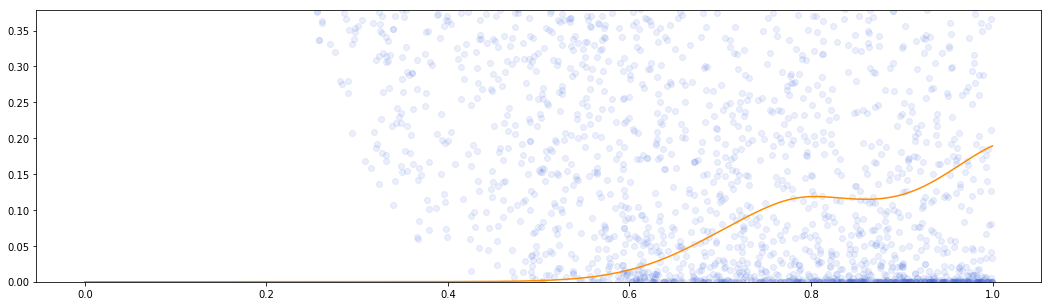



## iteration 40
n_rej:  5739
n_rej sig:  5732.726
FD esti mirror: 498
FD esti mirror sig: 508.78043
loss1:  [-0.17128466]
loss2:  [0.]
Estimated FDP: [0.08875015]
FDP: 0.0
Slope: a=[4.2985945], b=[-10.22651]
Bump 0: w=-5.53028, mu=[0.7526741], sigma=[0.00197658]
Bump 1: w=-7.1895986, mu=[0.89300823], sigma=[0.01625363]
Bump 2: w=-4.7224836, mu=[0.9686955], sigma=[0.0331498]
Bump 3: w=-1.7256156, mu=[1.0975153], sigma=[0.01624927]
Bump 4: w=-2.3428226, mu=[0.79824406], sigma=[0.01898587]


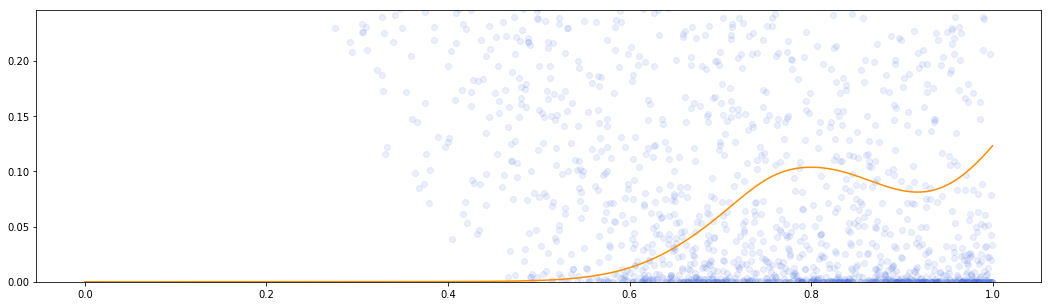



## iteration 60
n_rej:  5726
n_rej sig:  5719.005
FD esti mirror: 488
FD esti mirror sig: 502.49335
loss1:  [-0.1708747]
loss2:  [0.]
Estimated FDP: [0.08786377]
FDP: 0.0
Slope: a=[4.293529], b=[-10.231676]
Bump 0: w=-5.5353265, mu=[0.74512726], sigma=[0.00197658]
Bump 1: w=-7.1952596, mu=[0.89333916], sigma=[0.01625363]
Bump 2: w=-4.7282786, mu=[0.97249454], sigma=[0.0331498]
Bump 3: w=-1.7313612, mu=[1.1044073], sigma=[0.01624927]
Bump 4: w=-2.3472085, mu=[0.7924917], sigma=[0.01898587]


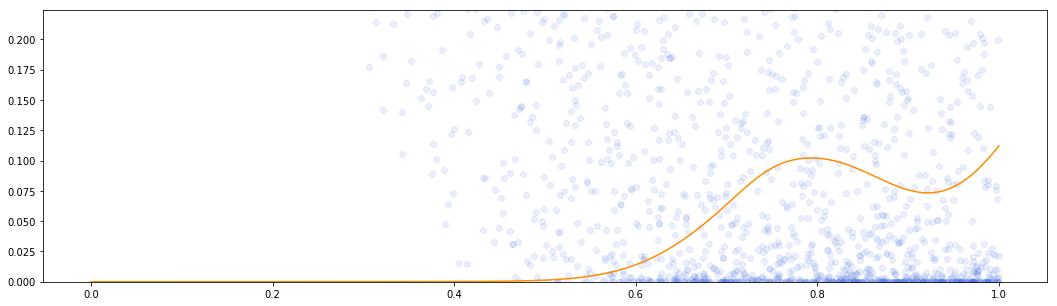



## iteration 80
n_rej:  5758
n_rej sig:  5756.106
FD esti mirror: 495
FD esti mirror sig: 510.38788
loss1:  [-0.17198321]
loss2:  [0.]
Estimated FDP: [0.08866894]
FDP: 0.0
Slope: a=[4.296914], b=[-10.228414]
Bump 0: w=-5.531284, mu=[0.74356496], sigma=[0.00197658]
Bump 1: w=-7.19238, mu=[0.88701236], sigma=[0.01625363]
Bump 2: w=-4.7262726, mu=[0.9671634], sigma=[0.0331498]
Bump 3: w=-1.731326, mu=[1.1032811], sigma=[0.01624927]
Bump 4: w=-2.3430536, mu=[0.7842941], sigma=[0.01898587]


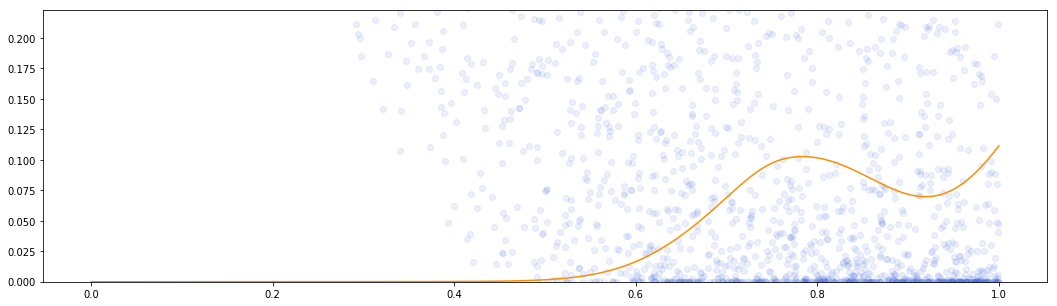

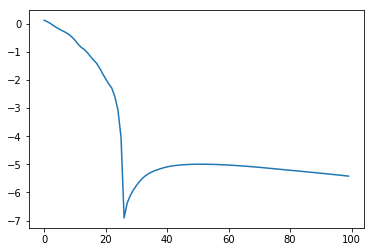

# Num of discovery: 6087




In [11]:
n_rej,t,theta=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=100,verbose=True)

In [6]:
x.shape

(33469,)